En este documento se pretende ejemplificar una manera de importar señales creadas en Python3 a LTspice XVII.


# Guia rápida en LTspice

Al momento de asignar la señal al generador de señales selecciónar:PWL file.

![Seleccionar PWL file.](img/guia1.png)

Este archivo PWL no es más que un TXT con dos columnas: **t y v(t) todo en [s] y [V] respectivamente.**

Ambas columnas están separadas por una tabulación, y todas las filas están separadas por un salto de línea.

# Generando el archivo PWL

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Suma de senoides.

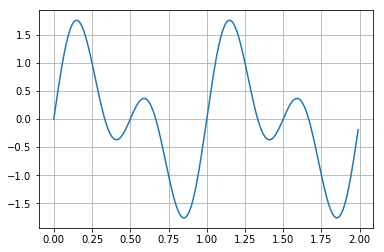

In [12]:
#Creo el archivo.txt que será levantado por LTspice
file1=open("mysignal.txt","w")

#armo la señal
paso=0.00001;#paso
T=0.001;#seg
t=np.arange(0,2*T,paso);# (inicio,final,paso)

f=1/T;
x1=np.sin(2*np.pi*f*t);
x2=np.sin(2*np.pi*(2*f)*t);
x=x1+x2

# Escribo el archivo con estos datos.
L=[]
for i in range(0,len(t)):
    L.append(str(t[i])+"\t"+str(x[i])+"\n")
    
# \n es puesto para indicar el EOL (End of Line) 
file1.writelines(L) 
file1.close() # Lo cierro para liberar la memoria utilizada.

plt.plot(t/T,x),plt.grid(True);

![Ejemplo en spice.](img/ejemplo1.png)

**Nota:** Después de 2ms (el tiempo máximo de la muestra creada) LTspice completa la señal dejando el último valor que recibió. En otras palabras, fija una constante con ese último valor.

## Modulación AM

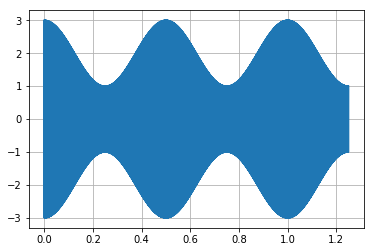

In [40]:
#Creo el archivo.txt que será levantado por LTspice
file1=open("myAMsignal.txt","w")

paso=0.00001;#paso
T=0.05;#seg
t=np.arange(0,25*T,paso);# (inicio,final,paso)
f=1/T;

m=np.cos(2*np.pi*2*t);
c=2*np.cos(2*np.pi*1000*t);
x=(1+m/2)*c

# Escribo el archivo con estos datos.
L=[]
for i in range(0,len(t)):
    L.append(str(t[i])+"\t"+str(x[i])+"\n")
    
# \n es puesto para indicar el EOL (End of Line) 
file1.writelines(L) 
file1.close() # Lo cierro para liberar la memoria utilizada.

plt.plot(t,x),plt.grid(True);

![Ejemplo2-AM.](img/ejemplo2.png)

---
---
Espero le sea de utilidad.

Alegre Ezequiel.

>Crı́ticas, aportes, sugerencias, son todas bienvenidas a la
siguiente dirección de correo electrónico: ealegremendoza@gmail.com